In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
def build_model():
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(13,), name='input'),
        keras.layers.Dense(50, activation='relu', name='h1'),
        keras.layers.Dense(50, activation='relu', name='h2'),
        keras.layers.Dense(1, name='output')
    ], name='Sequential')
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse'
    )
    return model

In [3]:
data = pd.read_csv('../../data/cleansed.csv', index_col=0)
data.head()

,Net Income Before Taxes,Total Liabilities,Income Available to Common Excluding Extraordinary Items,avg Volume,Total Liabilities & Shareholders' Equity,Diluted Net Income,Net Income Before Extraordinary Items,Total Assets,Diluted Weighted Average Shares,Total Equity,Total Common Shares Outstanding,Net Income After Taxes,Net Income,High,Low
0,0.256721,0.009259,0.242315,0.015391,0.012484,0.244534,0.242315,0.012484,0.029191,0.063605,0.029990,0.247508,0.242153,208.95,163.38
1,0.253811,0.009970,0.238286,0.021397,0.012557,0.240516,0.238286,0.012557,0.029036,0.059451,0.030301,0.243599,0.238123,182.54,114.04
2,0.246107,0.010004,0.230782,0.017608,0.011840,0.233035,0.230782,0.011840,0.029181,0.054105,0.030165,0.236173,0.230618,219.75,150.58
3,0.255270,0.007716,0.238935,0.016673,0.009660,0.239665,0.238935,0.009660,0.030026,0.053596,0.030239,0.244286,0.237269,259.77,176.87
4,0.206828,0.000024,0.192936,0.001604,0.000356,0.195299,0.192936,0.000356,0.002219,0.037786,0.002317,0.198485,0.192764,379.30,261.27


In [4]:
data = shuffle(data)
data.head()

,Net Income Before Taxes,Total Liabilities,Income Available to Common Excluding Extraordinary Items,avg Volume,Total Liabilities & Shareholders' Equity,Diluted Net Income,Net Income Before Extraordinary Items,Total Assets,Diluted Weighted Average Shares,Total Equity,Total Common Shares Outstanding,Net Income After Taxes,Net Income,High,Low
581,0.207073,0.000689,0.195984,0.007867,0.001055,0.198339,0.195984,0.001055,0.004800,0.038402,0.004975,0.201512,0.195813,456.23,182.07
1563,0.214869,0.003943,0.200625,0.010029,0.005684,0.202963,0.200625,0.005684,0.016345,0.050033,0.016879,0.206127,0.200452,78.54,60.26
1111,0.211633,0.001701,0.197465,0.007613,0.002412,0.199814,0.197465,0.002412,0.007175,0.041427,0.007336,0.203008,0.197293,99.87,52.95
1941,0.215766,0.004773,0.200896,0.005426,0.005369,0.203287,0.200896,0.005369,0.003090,0.042327,0.003235,0.206306,0.200777,207.30,64.00
1487,0.218166,0.067131,0.204972,0.010477,0.064836,0.207300,0.204972,0.064836,0.014365,0.056635,0.014618,0.210500,0.204803,75.58,40.42


In [5]:
y = data[['High']]
y.head()

,High
581,456.23
1563,78.54
1111,99.87
1941,207.30
1487,75.58


In [6]:
alt_y = (y-y.mean()) / y.std()
alt_y = (alt_y-alt_y.min()) / (alt_y.max()-alt_y.min())
alt_y.head()

,High
581,0.075823
1563,0.012660
1111,0.016227
1941,0.034193
1487,0.012165


In [7]:
x = data.drop(['High', 'Low'], axis=1)
print(len(list(x)))
x.head()

13


,Net Income Before Taxes,Total Liabilities,Income Available to Common Excluding Extraordinary Items,avg Volume,Total Liabilities & Shareholders' Equity,Diluted Net Income,Net Income Before Extraordinary Items,Total Assets,Diluted Weighted Average Shares,Total Equity,Total Common Shares Outstanding,Net Income After Taxes,Net Income
581,0.207073,0.000689,0.195984,0.007867,0.001055,0.198339,0.195984,0.001055,0.004800,0.038402,0.004975,0.201512,0.195813
1563,0.214869,0.003943,0.200625,0.010029,0.005684,0.202963,0.200625,0.005684,0.016345,0.050033,0.016879,0.206127,0.200452
1111,0.211633,0.001701,0.197465,0.007613,0.002412,0.199814,0.197465,0.002412,0.007175,0.041427,0.007336,0.203008,0.197293
1941,0.215766,0.004773,0.200896,0.005426,0.005369,0.203287,0.200896,0.005369,0.003090,0.042327,0.003235,0.206306,0.200777
1487,0.218166,0.067131,0.204972,0.010477,0.064836,0.207300,0.204972,0.064836,0.014365,0.056635,0.014618,0.210500,0.204803


In [8]:
dataset = tf.data.Dataset.from_tensor_slices((x.values, alt_y.values))
for feat, targ in dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [0.20707268 0.00068892 0.19598446 0.00786719 0.00105539 0.19833857
 0.19598446 0.00105539 0.00479976 0.03840214 0.00497517 0.20151243
 0.19581284], Target: [0.0758233]
Features: [0.21486885 0.00394342 0.20062487 0.01002897 0.00568415 0.20296283
 0.20062487 0.00568415 0.01634537 0.05003308 0.01687939 0.20612686
 0.20045167], Target: [0.01265979]
Features: [0.21163272 0.00170071 0.19746468 0.00761295 0.00241157 0.19981445
 0.19746468 0.00241157 0.00717488 0.04142684 0.00733603 0.2030079
 0.19729337], Target: [0.01622695]
Features: [0.21576592 0.00477288 0.20089633 0.00542578 0.00536865 0.20328712
 0.20089633 0.00536865 0.00308967 0.04232672 0.00323475 0.20630574
 0.20077698], Target: [0.03419315]
Features: [0.21816617 0.06713099 0.20497247 0.01047749 0.06483608 0.20730026
 0.20497247 0.06483608 0.01436527 0.05663518 0.01461843 0.21049968
 0.20480277], Target: [0.01216477]


2022-07-03 15:13:20.824160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
print(len(dataset))
print(int(len(dataset)*0.75))

1988
1491


In [10]:
test_split = 0.2
test_dataset = dataset.take(int(len(dataset)*test_split)).batch(1)

In [11]:
for feat, targ in test_dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [[0.20707268 0.00068892 0.19598446 0.00786719 0.00105539 0.19833857
  0.19598446 0.00105539 0.00479976 0.03840214 0.00497517 0.20151243
  0.19581284]], Target: [[0.0758233]]
Features: [[0.21486885 0.00394342 0.20062487 0.01002897 0.00568415 0.20296283
  0.20062487 0.00568415 0.01634537 0.05003308 0.01687939 0.20612686
  0.20045167]], Target: [[0.01265979]]
Features: [[0.21163272 0.00170071 0.19746468 0.00761295 0.00241157 0.19981445
  0.19746468 0.00241157 0.00717488 0.04142684 0.00733603 0.2030079
  0.19729337]], Target: [[0.01622695]]
Features: [[0.21576592 0.00477288 0.20089633 0.00542578 0.00536865 0.20328712
  0.20089633 0.00536865 0.00308967 0.04232672 0.00323475 0.20630574
  0.20077698]], Target: [[0.03419315]]
Features: [[0.21816617 0.06713099 0.20497247 0.01047749 0.06483608 0.20730026
  0.20497247 0.06483608 0.01436527 0.05663518 0.01461843 0.21049968
  0.20480277]], Target: [[0.01216477]]


In [12]:
train_dataset = dataset.skip(int(len(dataset)*test_split))
train_dataset = train_dataset.batch(20)
for feat, targ in train_dataset.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [[2.13838044e-01 8.87016952e-03 2.00580477e-01 7.54344741e-03
  1.37381621e-02 2.03346696e-01 2.01869478e-01 1.37381621e-02
  1.36637310e-02 7.51112933e-02 1.41415236e-02 2.07356981e-01
  2.02126025e-01]
 [2.09075970e-01 4.80827656e-03 1.94570831e-01 1.98424880e-02
  5.96273206e-03 1.96929074e-01 1.95041188e-01 5.96273206e-03
  1.87255018e-02 4.63336606e-02 2.00152904e-02 2.00575638e-01
  1.94869365e-01]
 [2.28435857e-01 3.46161796e-03 2.11737590e-01 8.70366183e-03
  3.25843445e-03 2.14045570e-01 2.11737590e-01 3.25843445e-03
  1.20301436e-02 3.58902987e-02 1.25940796e-02 2.18810404e-01
  2.11569331e-01]
 [2.13685806e-01 7.99762891e-03 2.02245081e-01 1.42187462e-02
  8.72788625e-03 2.04580854e-01 2.02325323e-01 8.72788625e-03
  2.20736809e-02 4.50932766e-02 2.31133330e-02 2.08049612e-01
  2.02155055e-01]
 [2.28457199e-01 1.06748561e-02 2.16048487e-01 8.31311906e-02
  9.17418566e-03 2.18343845e-01 2.16048487e-01 9.17418566e-03
  7.09282947e-02 3.06721447e-02 6.84871435e-02 2.2

Epoch 1/1000
80/80 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 2/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 3/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 4/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 5/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 6/1000
80/80 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 7/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 8/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 9/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 10/1000
80/80 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 11/1000
80/80 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 12/1000
80/80 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 13/1000
80/80 [====

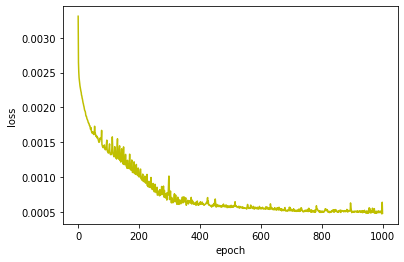

In [13]:
model = build_model()
hist = model.fit(train_dataset, epochs=1000, batch_size=20)
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
result = model.evaluate(test_dataset, return_dict=True)
print(result)

397/397 [==============================] - 1s 2ms/step - loss: 8.1038e-04
{'loss': 0.0008103767759166658}


In [15]:
def revert(value):
    value = value * (alt_y.max().values[0] - alt_y.min().values[0]) + alt_y.min().values[0]
    value = value * y.std().values[0] + y.mean().values[0]
    return value

In [16]:
y_oris = []
y_hats = []
errs = []
for feat, targ in test_dataset:
    pred = model.predict(feat, verbose=False)
    y_ori = revert(targ.numpy()[0][0])
    y_hat = revert(pred[0][0])
    err = (y_ori - y_hat) / y_ori * 100
    print(f'Target={y_ori:0.2f}\tPredict={y_hat:0.2f}\tError={err:0.2f}%')
    y_oris.append(y_ori)
    y_hats.append(y_hat)
    errs.append(err/100)
result = model.evaluate(test_dataset, return_dict=True)
print(result)

Target=202.21	Predict=186.69	Error=7.67%
Target=181.91	Predict=184.02	Error=-1.16%
Target=183.06	Predict=185.83	Error=-1.51%
Target=188.83	Predict=196.23	Error=-3.92%
Target=181.75	Predict=189.59	Error=-4.31%
Target=182.75	Predict=184.92	Error=-1.19%
Target=194.14	Predict=190.51	Error=1.87%
Target=182.04	Predict=183.86	Error=-1.00%
Target=180.73	Predict=184.67	Error=-2.18%
Target=181.42	Predict=184.84	Error=-1.88%
Target=200.43	Predict=182.87	Error=8.76%
Target=182.40	Predict=184.91	Error=-1.37%
Target=179.36	Predict=183.07	Error=-2.07%
Target=194.95	Predict=185.14	Error=5.03%
Target=180.97	Predict=188.20	Error=-4.00%
Target=189.60	Predict=186.70	Error=1.53%
Target=182.40	Predict=184.46	Error=-1.13%
Target=183.32	Predict=185.57	Error=-1.22%
Target=190.91	Predict=191.81	Error=-0.47%
Target=181.67	Predict=182.04	Error=-0.20%
Target=203.89	Predict=190.70	Error=6.47%
Target=181.65	Predict=184.13	Error=-1.37%
Target=179.62	Predict=182.02	Error=-1.34%
Target=189.50	Predict=189.10	Error=0.21%

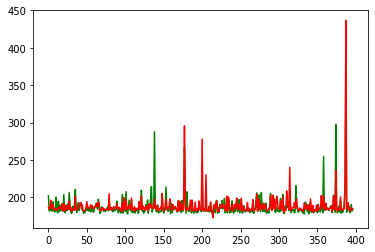

In [17]:
plt.plot(y_oris, 'g')
plt.plot(y_hats, 'r')
plt.show()

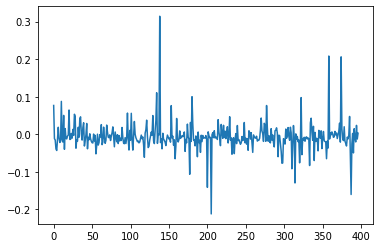

In [18]:
plt.plot(errs)
plt.show()

In [19]:
import pandas as pd

data = {'Target': y_oris, 'Predict': y_hats, 'Errors': errs}
df = pd.DataFrame(data)
df.head()

,Target,Predict,Errors
0,202.206346,186.690928,0.076731
1,181.911146,184.019558,-0.011590
2,183.057315,185.828745,-0.015140
3,188.830074,196.225177,-0.039163
4,181.752090,189.589647,-0.043122


In [20]:
sorted_df = df.sort_values(by=['Errors'], axis=0)
sorted_df.head()

,Target,Predict,Errors
205,189.954749,230.239979,-0.212078
387,376.510572,436.874142,-0.160324
200,243.699497,278.153539,-0.141379
314,212.532078,240.091175,-0.129670
177,267.179576,295.649876,-0.106559
